In [1]:
# imports
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import pi

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 8,6

In [3]:
data = pd.read_excel("USDA_Food_Database.xlsx")

#### Task 1: Clustering
In this task you will have to cluster the food types according to two nutrition elements. The following combinations are suggestions, you can also find your own preferred combination of nutrition elements:

Energy_(kcal) and Protein_(g)  
Energy_(kcal) and Carbohydrt_(g)  
Energy_(kcal) and Water_(g)  
Energy_(kcal) and FA_Sat_(g)  
Water_(g) and Zinc_(mg)  
Water_(g) and Iron_(mg)  
Water_(g) and Phosphorus_(mg)  
Water_(g) and Sugar_(g)  
Sugar_(g) and Protein_(mg)  
Statistical analysis: Use the Python functionalities, for example sklearn.cluster, to cluster the data.  
Visualization: Use a 2D scatter plot, or any other visualization you would prefer, to identify the clusters. Use the Python plotting functionalities, for example pyplot.  

Please answer the following questions in the final report:

Why did you select the specific combination of nutrition elements?  
How did you find out how many clusters need to be formed to describe the data best?  
Which Python functionality did you use for the statistical analysis and which visualization type did you employ?  
Which aspects of the task (e.g., identifying the number of clusters) where easier to solve by using statistical analysis, and which by using visualization?  

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

arg_x = "Water_(g)"
arg_y = "Sugar_Tot_(g)"

scaler = StandardScaler()
df = data[[arg_y, arg_x]]
df.dropna(inplace=True)
df[df.columns] = scaler.fit_transform(df[df.columns])
kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=1)
kmeans.fit(df)
labels = kmeans.labels_

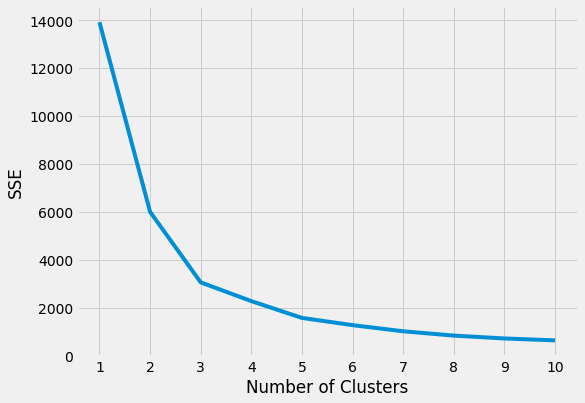

In [5]:
#from https://realpython.com/k-means-clustering-python/

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df[df.columns])
    sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.savefig('figures/task_1_elbow.jpg', bbox_inches='tight')

In [6]:
#from https://realpython.com/k-means-clustering-python/
from kneed import KneeLocator

kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

3

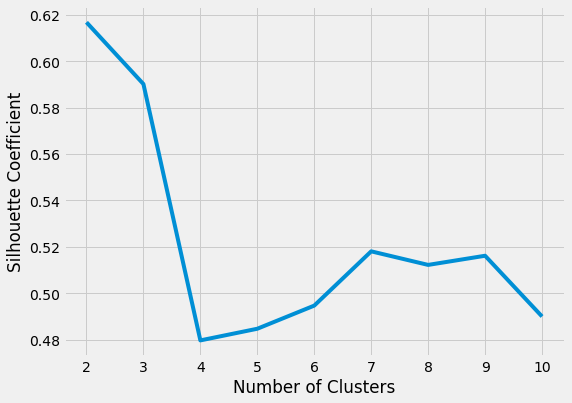

In [7]:
#from https://realpython.com/k-means-clustering-python/
from sklearn.metrics import silhouette_score

# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df[df.columns])
    score = silhouette_score(df[df.columns], kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.savefig('figures/task_1_silhouette.jpg', bbox_inches='tight')

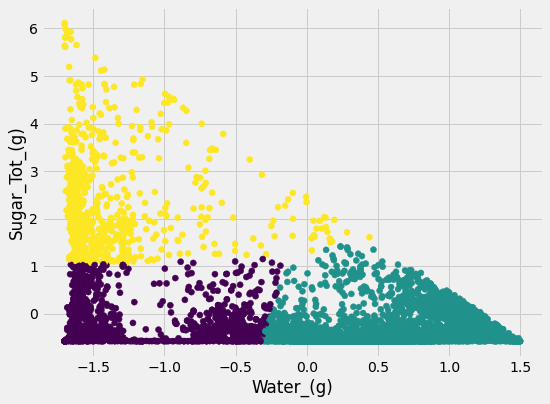

In [8]:
plt.scatter(x=df[arg_x], y=df[arg_y], c=labels.astype(float))
plt.xlabel(arg_x)
plt.ylabel(arg_y)
plt.savefig('figures/task_1_clusters.jpg', bbox_inches='tight')

#### Task 2: Correlation
In this task you will have to find at least three strong correlations (either positive or negative) between different nutrition elements.

Statistical analysis: Use the Python functionalities, for example numpy corrcoef, to identify correlations.  
Visualization: Use parallel coordinates, or any other visualization you would prefer, to identify correlations. Use the Python plotting functionalities, for example pyplot.  

Please answer the following questions in the final report:

Describe the correlations you found in the data.  
Which Python functionalities did you employ for the statistical analysis?  
Which visualization type did you use?  
Do you think that correlations can be missed when either using only statistical analysis or when using only visualization?

In [30]:
#from https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
df2 = data.drop(['No', 'Keyword', 'Name'], inplace = False, axis=1)

x = df2.corr('pearson')
print('Ash/Sodium: ' + x.loc['Ash_(g)'].loc['Sodium_(mg)'].astype(str))
print('Water/Energy: ' + x.loc['Water_(g)'].loc['Energy_(kcal)'].astype(str))
print('Water/Carbohydrates: ' + x.loc['Water_(g)'].loc['Carbohydrt_(g)'].astype(str))

Ash/Sodium: 0.8256807213372833
Water/Energy: -0.9005536415026826
Water/Carbohydrates: -0.7739198499433799


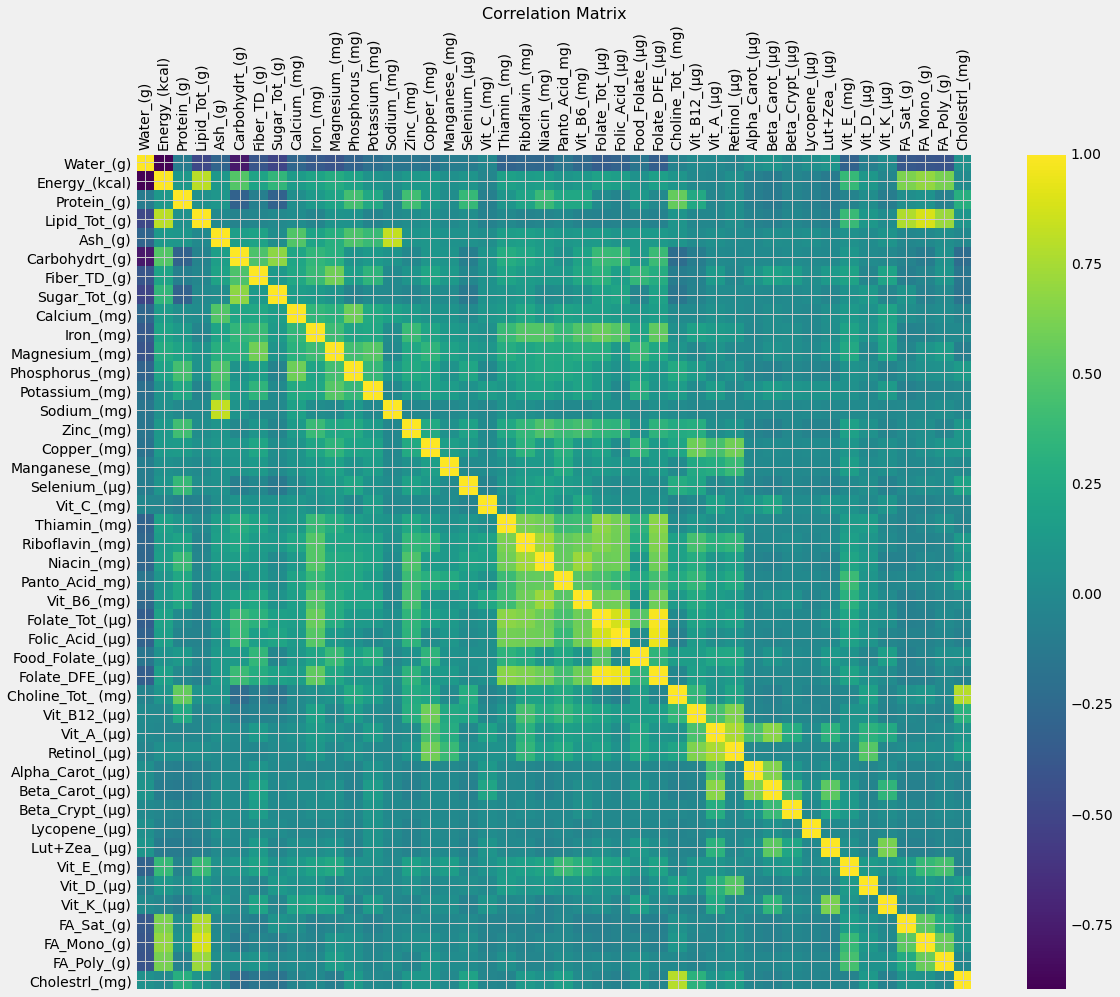

In [10]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df2.corr('pearson'), fignum=f.number)
plt.xticks(range(df2.shape[1]), df2.columns, fontsize=14, rotation=90)
plt.yticks(range(df2.shape[1]), df2.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.savefig('figures/task_2_matrix.jpg', bbox_inches='tight')

#### Task 3: Comparison
In this task you will have to compare different groups in the data. You will have to select three groups and find out the differences among them. Every food type has a keyword assigned which defines its membership to a certain group.

These are some suggestions for group comparisons, but you can also select others:

BEEF vs. PORK  
BEEF vs. VEAL  
BEEF vs. VENISON  
BEVERAGES vs. ALCOHOLIC BEVERAGES  
FISH vs. SEAFOOD  
CHICKEN vs. TURKEY  
ANIMAL FAT vs. VEGETABLE FAT  
You may also further filter the groups (e.g., use only cereals in the GRAIN group) if you think that the groups are too heterogeneous, or do in-groups comparisons (e.g., compare food from restaurants against food from fast food chains in the PROCESSED FOOD group). The selected groups do not have to be of the same size.  

Statistical analysis: Use the Python functionalities to identify differences.  
Visualization: Use radar charts, or any other visualization you would prefer, to identify differences. Use the Python plotting functionalities, for example pyplot.  

Please answer the following questions in the final report:

Which groups did you use and why?  
Describe the differences among the three groups.  
Which Python functionalities did you employ for the statistical analysis and which visualization type did you use?  
Was it easier to do the comparison with statistical analysis only, or by employing visualization?  

In [11]:
def radar_charts(dflist):
    fig = plt.figure(figsize=(12,12))
    for i in range(0,len(dflist)):
        dfs = dflist[i]

        # ------- PART 1: Create background
     
        # number of variable
        categories=list(dfs)[1:]
        N = len(categories)
        
        # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
        angles = [n / float(N) * 2 * pi for n in range(N)]
        angles += angles[:1]
     
        # Initialise the spider plot
        ax = plt.subplot(2,2,i+1, polar=True)
        plt.subplots_adjust(wspace=0.5)
     
        # If you want the first axis to be on top:
        ax.set_theta_offset(pi / 2)
        ax.set_theta_direction(-1)
        ax.spines['polar'].set_visible(False)
     
        # Draw one axe per variable + add labels labels yet
        plt.xticks(angles[:-1], categories)
     
        # Draw ylabels
        ax.set_rlabel_position(0)
        #plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
        plt.ylim(0,max(dflist[i].select_dtypes(include=[np.number]).max()))
     
     
        # ------- PART 2: Add plots
     
        # Plot each individual = each line of the data
        # I don't do a loop, because plotting more than 3 groups makes the chart unreadable
     
        # Ind1
        values=dfs.loc[0].drop('Keyword').values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=dfs.loc[0, 'Keyword'])
        ax.fill(angles, values, 'b', alpha=0.1)
         
        # Ind2
        values=dfs.loc[1].drop('Keyword').values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=dfs.loc[1, 'Keyword'])
        ax.fill(angles, values, 'r', alpha=0.1)
         
    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    
    #return fig #if we return the fig, plot is printed into output twice
    
def get_by_groups(data, str1, str2):
    res = data.loc[[str1, str2]]
    res = np.split(res, 4, axis=1)
    np.array([xi.reset_index(inplace=True) for xi in res])
    return res

In [12]:
df3 = data.groupby('Keyword')[df2.columns].mean() #use df2.columns to exclude No, Name
df3[1:] = df3[df3[1:].mean().sort_values().index] #sort ascending to split later, try to keep similar magnitude numbers together

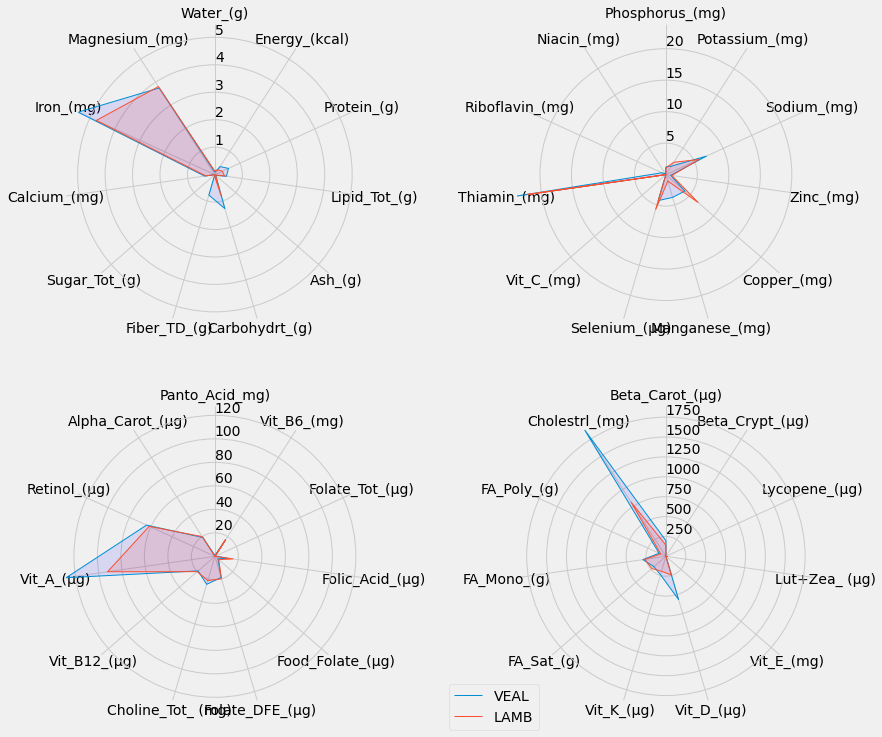

In [13]:
radar_charts(get_by_groups(df3, 'VEAL', 'LAMB'))
plt.savefig('figures/task_3_1.jpg', bbox_inches='tight')

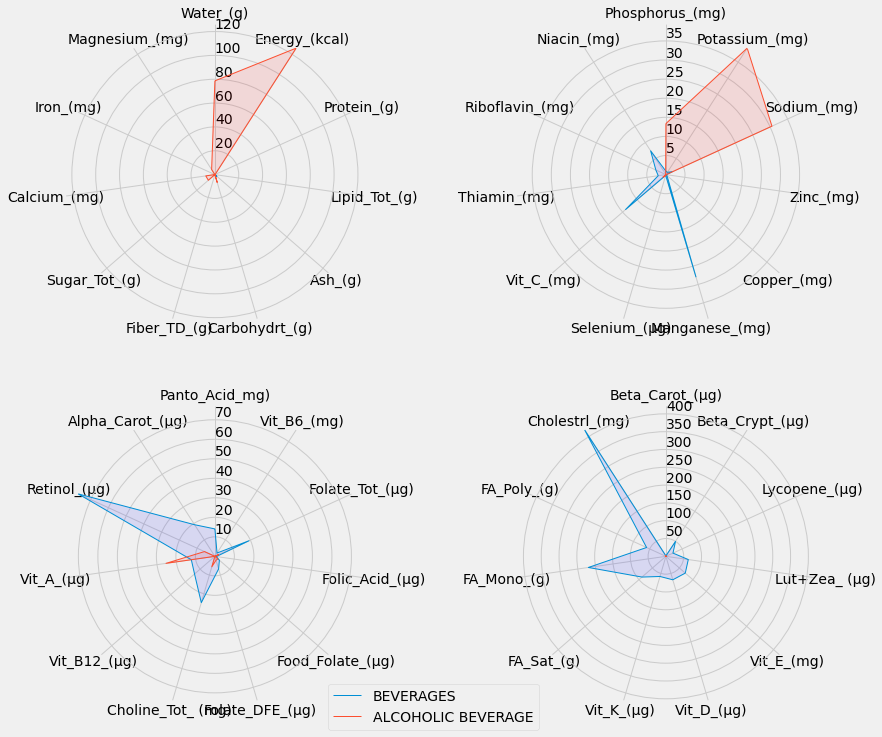

In [14]:
radar_charts(get_by_groups(df3, 'BEVERAGES', 'ALCOHOLIC BEVERAGE'))
plt.savefig('figures/task_3_2.jpg', bbox_inches='tight')

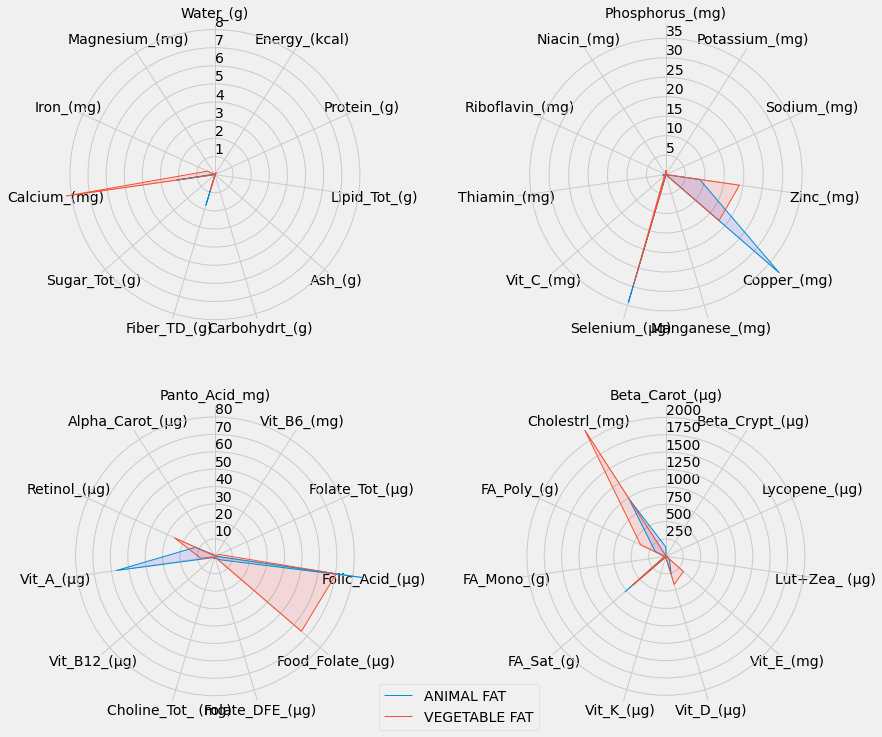

In [15]:
radar_charts(get_by_groups(df3, 'ANIMAL FAT', 'VEGETABLE FAT'))
plt.savefig('figures/task_3_3.jpg', bbox_inches='tight')

In [55]:
dfx = data.loc[data['Keyword']=='BEVERAGES']
dfx.sort_values(by=['Water_(g)']).head(60)

,No,Keyword,Name,Water_(g),Energy_(kcal),Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),...,Beta_Crypt_(µg),Lycopene_(µg),Lut+Zea_ (µg),Vit_E_(mg),Vit_D_(µg),Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg)
4365,14357,BEVERAGES,"BEVERAGES,TEA,INST,DECAFFEINATED,LEMON,SWTND",0.13,401,0.12,0.73,0.47,98.55,0.0,...,0.0,0.0,0.0,0.00,NaN,0.0,0.091,0.027,0.209,0.0
4369,14370,BEVERAGES,"BEVERAGES,TEA,INST,LEMON,SWTND,PDR",0.13,401,0.12,0.73,0.47,98.55,0.7,...,0.0,0.0,0.0,0.00,0.0,0.0,0.097,0.033,0.218,0.0
4380,14407,BEVERAGES,"BEVERAGES,ORANGE-FLAVOR DRK,BRKFST TYPE,PDR",0.14,386,0.00,0.00,0.92,98.94,0.4,...,1.0,0.0,1.0,0.00,0.0,0.0,0.000,0.000,0.000,0.0
4325,14270,BEVERAGES,"BEVERAGES,COFFEE,INST,VANILA,SWTND,DECAFF,W/ N...",0.16,465,0.00,13.33,0.23,86.28,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,13.333,0.000,0.000,0.0
4426,14548,BEVERAGES,"BEVERAGES,TEA,INST,LEMON,W/ ADDED VIT C",0.30,385,0.60,0.30,1.10,97.60,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.037,0.011,0.091,0.0
4359,14350,BEVERAGES,"STRAWBERRY-FLAVOR BEV MIX,PDR",0.40,389,0.10,0.20,0.20,99.10,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.000,0.000,0.000,0.0
4342,14296,BEVERAGES,"BEVERAGES,LEMONADE-FLAVOR DRK,PDR",0.52,380,0.00,1.01,0.57,97.90,0.0,...,0.0,0.0,0.0,0.08,0.0,1.9,0.183,0.129,0.531,0.0
4136,14024,BEVERAGES,"BEVERAGES,WHISKEY SOUR MIX,PDR",0.60,383,0.60,0.10,1.40,97.30,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.019,0.006,0.037,0.0
4163,14058,BEVERAGES,"BEVERAGES,WHEY PROT PDR ISOLATE",0.86,359,58.14,1.16,10.77,29.07,0.0,...,0.0,0.0,0.0,7.85,0.0,46.5,0.581,0.149,0.021,12.0
4432,14557,BEVERAGES,"BEVERAGE,CHOCOLATE-FLAVOR BEV MIX FOR MILK,PDR...",1.10,400,4.55,2.27,1.80,90.28,4.5,...,0.0,0.0,0.0,0.04,0.0,0.9,2.273,0.000,0.000,0.0
